# Assignment 4: Build Non-Linear Models Part 2
### Kirti Sharma
### School of Technology & Engineering, National University
### DDS-8555: Predictive Analysis
### Professor Mohammad Yavarimanesh
### December 14, 2025

## Objectives
This notebook contains my work for Assignment 4, including:

1. Conceptual Question #3 (ISLR, Chapter 7)
2. Applied Question #8 (ISLR, Chapter 7)
3. Kaggle Regression with Abalone competition
4. References
5. Appendix A: Kaggle Submission Evidence

All Python code, model summaries, and plots are included below.

### GitHub Repository for Code  
All project files, including the notebook and submission CSVs, are available at:  
https://github.com/KirtiSharmaDS/SharmaKDDS8555-4

## Q3. Conceptual Question - Chapter 7

Suppose we fit a curve with basis functions b1(*X*) = *X*, b2(*X*) = (*X* − 1)^2 *I* (*X* ≥ 1). (Note that *I*(*X* ≥ 1) equals 1 for *X* ≥ 1 and 0 otherwise.) We fit the linear regression model

*Y = β0 + β1b1(X) + β2b2(X) + ε*,

and obtain coefficient estimates *βˆ0* = 1, *βˆ1* = 1, *βˆ2* = −2. Sketch the estimated curve between *X* = −2 and *X* = 2. Note the intercepts, slopes, and other relevant information.


### Q3: Estimated Curve Using Basis Functions

We are given two basis functions defined as

b1(*X*) = *X* and

b2(*X*) = (*X* − 1)^2 *I* (*X* ≥ 1)

where the indicator function *I*(*X* ≥ 1) equals 1 when *X* ≥ 1 and 0 otherwise. Using these basis functions, the fitted linear regression model is expressed as

*Y = β0 + β1b1(X) + β2b2(X) + ε*.

The estimated coefficients are *βˆ0* = 1, *βˆ1* = 1, and *βˆ2* = −2. Substituting these values into the model yields the estimated regression function

*Y^ = 1 + X - 2(X-1)^2 I (X ≥ 1)*.

Due to the indicator function, the estimated curve can be written in a piecewise form. For values of *X* < 1, the indicator term equals zero, and the model simplifies to

*Y^ = 1 + X*.

For values of *X* ≥ 1, the indicator term equals one, resulting in

*Y^ = 1 + X - 2(X-1)^2*.

Between *X* = -2 and *X* = 1, the estimated curve is a straight line with a constant slope of 1 and an intercept of 1. This linear relationship implies a steady increase in the response variable as *X* increases. At *X* = 1, the estimated value of the response is *Y^* = 2, and the function remains continuous at this point.

For *X* ≥ 1, the inclusion of the negative quadratic term produces a downward-opening parabolic shape. Although the response initially continues to increase immediately after *X* = 1, the curvature causes the slope to decrease, and the fitted values eventually decline as *X* increases. This change in curvature illustrates how basis functions allow regression models to capture nonlinear and piecewise behavior while remaining linear in the parameters, as discussed in James et al. (2023).
 

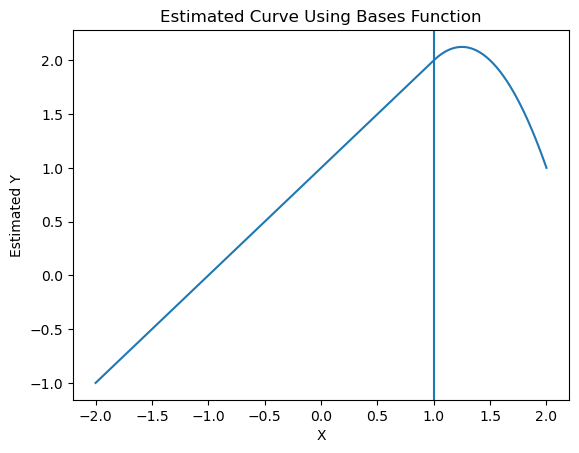

In [2]:
# Q3 Sketch of the estimated curve

import numpy as np
import matplotlib.pyplot as plt

# Create a sequence of X values from -2 to 2
X = np.linspace(-2, 2, 400)

# Define the estimated regression fuction
Y_hat = 1 + X - 2 * ((X - 1)**2) * (X >= 1)

# Plot the estimated curve
plt.figure()
plt.plot(X, Y_hat)
plt.axvline(x=1) # vertical line at the knot X = 1
plt.xlabel("X")
plt.ylabel("Estimated Y")
plt.title("Estimated Curve Using Bases Function")
plt.show()


#### Q3: Interpretation of the Estimated Curve

The plotted curve confirms the analytical results derived above. For values of *X* < 1, the relationship between *X* and *Y* is linear with a constant positive slope. At *X* = 1, the curve remains continuous but transitions into a downward-opening parabola, illustrating how the inclusion of a bases function introduces nonlinearity beyond a specified threshold. This visual representation reinforces the role of bases expansions in capturing piecewise nonlinear relationships (James, et al., 2023).

## Q8. Applied Question - Chapter 7

Fit some of the non-linear models investigated in this chapter to the `Auto` data set. Is there evidence for non-linear relationships in this data set? Create some informative plots to justify your answer.


### Q8: Objective

The purpose of this section is to fit non-linear regression models from Chapter 7 to the `Auto` dataset and evaluate whether there is evidence of non-linear relationships. I focus on `mpg` as the response and `horsepower` as the primary predictor because their relationship is commonly non-linear in vehicle performance data (James et al., 2023).


In [1]:
# Q8 Data Setup and Cleaning

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

# load Auto Dataset (ISLP)
from ISLP import load_data
Auto = load_data('Auto')

# EDA
print(Auto.columns)
print(Auto.shape)
print(Auto.isna().sum())

# Keeping only relevant columns and dropping the missing values (even though no missing values, it is a best practice to keep it when performing EDA)
df = Auto[['mpg', 'horsepower']].dropna()

df.head()


Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')
(392, 8)
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
dtype: int64


,mpg,horsepower
name,,
chevrolet chevelle malibu,18.0,130
buick skylark 320,15.0,165
plymouth satellite,18.0,150
amc rebel sst,16.0,150
ford torino,17.0,140


#### Q8: Data Setup and Initial Exploration

The `Auto` dataset contains multiple vehicle attributes related to fuel efficiency and engine performance. As part of exploratory data analysis, the dataset structure and completeness were examined. The dataset includes 392 observations and eight variables, and no missing values are detected in any of the columns.

Based on the objective of this analysis and visual inspection, `mpg` was selected as the response variable and `horsepower` as the primary predictor. These variables are commonly studied together and provide a meaningful context for investigating non-linear relationships (James et al., 2023). Therefore, subsequent analysis focus only on these two variables.


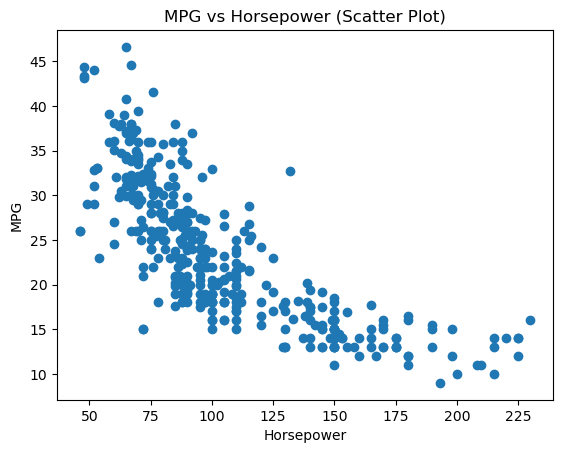

In [16]:
# Q8 Scatter plot (EDA)

plt.figure()
plt.scatter(df['horsepower'], df['mpg'])
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("MPG vs Horsepower (Scatter Plot)")
plt.show()


#### Q8: Interpretation

I first created a scatter plot of `mpg` versus `horsepower` as an exploratory data analysis step. The plot reveals a strong negative association between horsepower and fuel efficiency, with mpg decreasing as horsepower increases. Importantly, the pattern does not appear strictly linear. At lower horsepower values, mpg declines sharply, while at higher horsepower levels the rate of decline becomes more gradual. This visible curvature suggests that a simple linear regression model may not adequately capture the relationship, providing motivation for fitting non-linear models such as polynomial and spline regressions (James, et al., 2023).


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Fri, 12 Dec 2025   Prob (F-statistic):           7.03e-81
Time:                        18:27:39   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

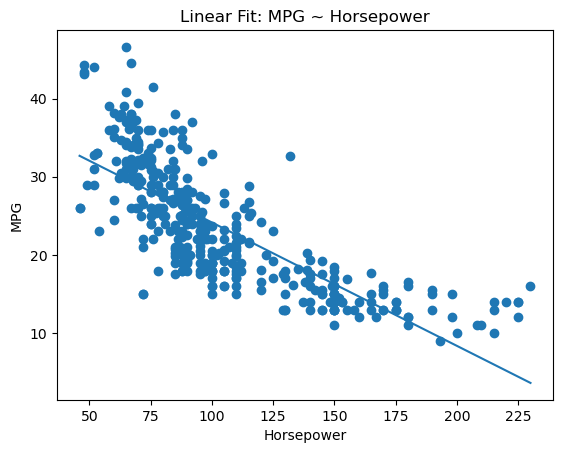

In [17]:
# Q8 Linear model + line

lin_mod = smf.ols("mpg ~ horsepower", data=df).fit()
print(lin_mod.summary())

# Create grid for smooth line
hp_grid = np.linspace(df['horsepower'].min(), df['horsepower'].max(), 300)
pred_lin = lin_mod.predict(pd.DataFrame({'horsepower': hp_grid}))

plt.figure()
plt.scatter(df['horsepower'], df['mpg'])
plt.plot(hp_grid, pred_lin)
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Linear Fit: MPG ~ Horsepower")
plt.show()


#### Q8: Interpretation

As a baseline comparison, I first fit a simple linear regression model with `mpg` as the response variable and `horsepower` as the predictor. The fitted model indicates a statistically significant negative relationship between horsepower and fuel efficiency. Specifically, the estimated slope coefficient for horsepower is −0.158 (*p* < .001), suggesting that for each one-unit increase in horsepower, mpg decreases by approximately 0.16 units on average.

The model explains approximately 60.6% of the variability in mpg (R^2 = 0.606), indicating a moderately strong linear association between the two variables. The fitted regression line, overlaid on the scatter plot, captures the overall downward trend observed in the data. However, visual inspection of the plot reveals systematic deviations from linearity, particularly at lower and higher horsepower values, where the linear model appears to underfit the observed pattern.

These results suggest that while the linear model provides a useful baseline and confirms a strong inverse relationship between horsepower and mpg, it may not fully capture the curvature present in the data. This motivates the exploration of non-linear models, such as polynomial and spline regressions, to better represent the underlying relationship (James et al., 2023).


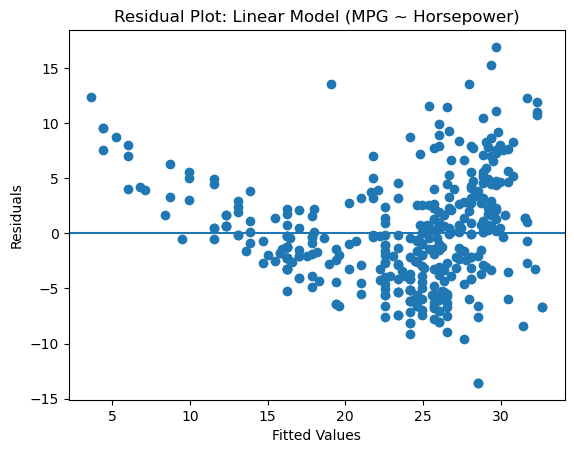

In [27]:
# Q8 Residual Plot

# Residual plot for linear model

residuals = lin_mod.resid
fitted = lin_mod.fittedvalues

plt.figure()
plt.scatter(fitted, residuals)
plt.axhline(0)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot: Linear Model (MPG ~ Horsepower)")
plt.show()


#### Q8: Interpretation

To assess model assumptions, I examined a residual plot for the linear regression model. The residuals display a systematic curved pattern rather than random scatter around zero, indicating a violation of the linearity assumption. This pattern suggests that a simple linear model is insufficient and further supports the use of nonlinear regression techniques, such as polynomial and spline models (James et al., 2023).


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Fri, 12 Dec 2025   Prob (F-statistic):           5.40e-99
Time:                        18:37:28   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             56.9001      1

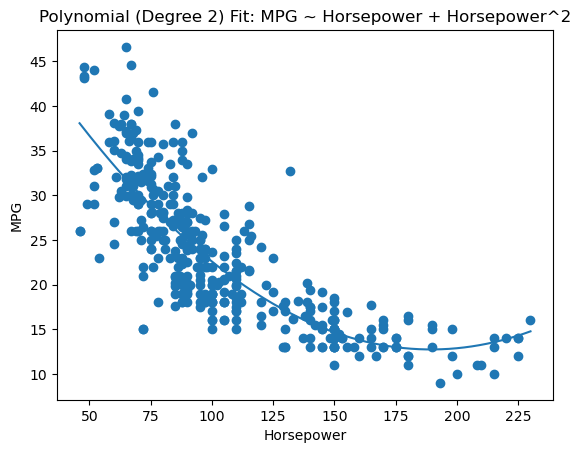

In [19]:
# Q8 Polynomial regression (degree 2) + curve

poly2_mod = smf.ols("mpg ~ horsepower + I(horsepower**2)", data=df).fit()
print(poly2_mod.summary())

pred_poly2 = poly2_mod.predict(pd.DataFrame({'horsepower': hp_grid}))

plt.figure()
plt.scatter(df['horsepower'], df['mpg'])
plt.plot(hp_grid, pred_poly2)
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Polynomial (Degree 2) Fit: MPG ~ Horsepower + Horsepower^2")
plt.show()


#### Q8: Interpretation

To investigate potential non-linear relationships suggested by the exploratory analysis, I next fit a second-degree polynomial regression model with `mpg` as the response variable and `horsepower` and `horsepower^2` as predictors. Both the linear and quadratic terms are statistically significant (*p* < .001), indicating that horsepower has a nonlinear effect on fuel efficiency.

The polynomial model explains approximately 68.8% of the variance in mpg (R^2 = 0.688), representing a meaningful improvement over the simple linear model (R^2 = 0.606). The negative coefficient for the linear horsepower term combined with the positive coefficient for the squared term produces a curved relationship, where mpg initially decreases sharply with increasing horsepower and then levels off at higher horsepower values.

Visual inspection of the fitted curve confirms that the polynomial model captures the observed curvature in the data more effectively than the linear model, particularly at low and high horsepower ranges. This improvement provides clear evidence that the relationship between horsepower and mpg is not purely linear and supports the use of non-linear regression techniques, as discussed in James et al. (2023).


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     287.9
Date:                Fri, 12 Dec 2025   Prob (F-statistic):           2.74e-98
Time:                        19:51:52   Log-Likelihood:                -1131.6
No. Observations:                 392   AIC:                             2271.
Df Residuals:                     388   BIC:                             2287.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

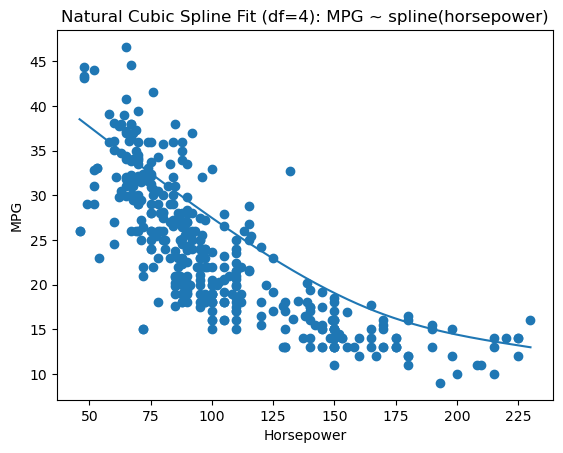

In [24]:
# Q8 Spline regression (natural cubic spline) + curve

from patsy import dmatrix

# Build natural cubic spline basis
spline_basis = dmatrix("cr(horsepower, df=4)", {"horsepower": df["horsepower"]}, return_type='dataframe')

spline_mod = sm.OLS(df["mpg"], sm.add_constant(spline_basis)).fit()
print(spline_mod.summary())

# Predict on grid
spline_basis_grid = dmatrix("cr(horsepower, df=4)", {"horsepower": hp_grid}, return_type='dataframe')
pred_spline = spline_mod.predict(sm.add_constant(spline_basis_grid))

plt.figure()
plt.scatter(df['horsepower'], df['mpg'])
plt.plot(hp_grid, pred_spline)
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Natural Cubic Spline Fit (df=4): MPG ~ spline(horsepower)")
plt.show()


#### Q8: Interpretation

To further explore nonlinear patterns between horsepower and fuel efficiency, I fit a natural cubic spline regression model with four degrees of freedom. Natural cubic splines allow the relationship between the predictor and response to vary smoothly across different regions of the predictor while constraining the function to be linear at the boundaries (James et al., 2023).

The spline model explains approximately 69.0% of the variance in mpg (R^2 = 0.690), which represents a slight improvement over the quadratic polynomial model (R^2 = 0.688) and a substantial improvement over the simple linear model (R^2 = 0.606). All spline basis coefficients are statistically significant (*p* < .001), indicating that different segments of the horsepower range contribute meaningfully to explaining fuel efficiency.

The fitted spline curve closely follows the observed data, capturing the steep decline in mpg at low horsepower levels and the gradual flattening of the relationship at higher horsepower values. This smooth, flexible fit confirms strong evidence of a nonlinear relationship between horsepower and mpg and demonstrates the advantage of spline-based methods for modeling complex, real-world patterns in regression analysis (James et al., 2023).

Taken together, the scatter plot, polynomial regression, and spline regression provide strong evidence that the relationship between horsepower and mpg in the `Auto` dataset is nonlinear.

In [26]:
# Q8 Comparison table (R^2 and RMSE)

from sklearn.metrics import mean_squared_error

# Predictions on training data (simple comparison)
df_pred = df.copy()
df_pred["lin"] = lin_mod.predict(df_pred)
df_pred["poly2"] = poly2_mod.predict(df_pred)

# spline prediction on training data
spline_basis_train = dmatrix("cr(horsepower, df=4)", {"horsepower": df_pred["horsepower"]}, return_type='dataframe')
df_pred["spline"] = spline_mod.predict(sm.add_constant(spline_basis_train))

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

results = pd.DataFrame({
    "Model": ["Linear", "Polynomial (deg2)", "Spline (cr df=4)"],
    "R^2": [lin_mod.rsquared, poly2_mod.rsquared, spline_mod.rsquared],
    "RMSE": [
        rmse(df_pred["mpg"], df_pred["lin"]),
        rmse(df_pred["mpg"], df_pred["poly2"]),
        rmse(df_pred["mpg"], df_pred["spline"])
    ]
})

results


,Model,R^2,RMSE
0,Linear,0.605948,4.893226
1,Polynomial (deg2),0.687559,4.357151
2,Spline (cr df=4),0.690012,4.340012


#### Q8: Interpretation

To formally compare model performance, I evaluated the linear, quadratic polynomial, and natural cubic spline models using both R^2 and root mean squared error (RMSE). R^2 measures the proportion of variance in mpg explained by the model, while RMSE quantifies the average prediction error in the original units of mpg.

The linear regression model explains approximately 60.6% of the variance in mpg and exhibits the largest prediction error (RMSE = 4.89). In contrast, the quadratic polynomial model substantially improves model fit, increasing the explained variance to 68.8% and reducing the RMSE to 4.36.

The natural cubic spline model with four degrees of freedom provides the best overall performance, achieving the highest R^2 (0.690) and the lowest RMSE (4.34). Although the improvement over the polynomial model is modest, the spline model offers a smoother and more flexible representation of the nonlinear relationship between horsepower and mpg.

Taken together, these results confirm that nonlinear models outperform the simple linear regression and provide strong evidence that the relationship between horsepower and fuel efficiency is nonlinear in the `Auto` dataset (James et al., 2023).


### Q8: Summary and Conclusion

In this analysis, I evaluated the relationship between horsepower and fuel efficiency using linear and nonlinear regression models. Initial exploratory analysis suggested curvature in the data, motivating the use of polynomial and spline-based approaches. Examination of the linear model residuals revealed systematic patterns rather than random scatter, indicating a violation of the linearity assumption.

Model comparison results show that both the quadratic polynomial and natural cubic spline models substantially outperform the simple linear regression in terms of explained variance and prediction error. The spline model achieved the highest R^2 and lowest RMSE, indicating the best overall fit. These findings provide clear evidence of a nonlinear relationship between `horsepower` and `mpg` in the `Auto` dataset (James et al., 2023).



## Kaggle Competition Overview (Dataset + Metric)

This section addresses the Kaggle “Regression with an Abalone Dataset” competition, where the goal is to predict the target variable `Rings` from physical measurements and a categorical sex indicator. Kaggle evaluates submissions using Root Mean Squared Logarithmic Error (RMSLE), which emphasizes relative errors and motivates modeling on a log-transformed target (Reade & Chow, 2024). Nonlinear methods (polynomial terms and spline-based functions) are used to capture curvature in the predictor–response relationship while keeping the model interpretable (James et al., 2023).


In [2]:
# Setup and Data Loading

import pandas as pd
import numpy as np

train_path = r"C:\Users\Kirti\train.csv"
test_path  = r"C:\Users\Kirti\test.csv"
sub_path   = r"C:\Users\Kirti\sample_submission.csv"

train = pd.read_csv(train_path)
test  = pd.read_csv(test_path)
sub   = pd.read_csv(sub_path)

print(train.info())
print(train.isna().sum())
print(train["Rings"].describe())

train.head(), train.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB
None
id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64
count    90615.000000
mean         9.696794
std          3.176221
min  

(   id Sex  Length  Diameter  Height  Whole weight  Whole weight.1  \
 0   0   F   0.550     0.430   0.150        0.7715          0.3285   
 1   1   F   0.630     0.490   0.145        1.1300          0.4580   
 2   2   I   0.160     0.110   0.025        0.0210          0.0055   
 3   3   M   0.595     0.475   0.150        0.9145          0.3755   
 4   4   I   0.555     0.425   0.130        0.7820          0.3695   
 
    Whole weight.2  Shell weight  Rings  
 0          0.1465        0.2400     11  
 1          0.2765        0.3200     11  
 2          0.0030        0.0050      6  
 3          0.2055        0.2500     10  
 4          0.1600        0.1975      9  ,
 (90615, 10))

#### Data Overview and Initial Checks

The Abalone training dataset contains 90,615 observations with ten variables, including one categorical predictor `Sex`, multiple continuous physical measurements, and the target variable `Rings`. Initial data inspection indicates that all variables are fully observed, with no missing values present across the dataset. The target variable `Rings` exhibits moderate variability, with values ranging from 1 to 29 and a mean of approximately 9.7 rings.

These results indicate that the dataset is clean and suitable for regression modeling without requiring row removal due to missing data. The presence of both numerical and categorical predictors motivates the use of preprocessing pipelines that incorporate encoding and transformation steps prior to model fitting (James et al., 2023).


In [3]:
# RMSLE setup + split

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Features/target
X = train.drop(columns=["Rings"])
y = train["Rings"]

# log-transform for RMSLE-friendly training
y_log = np.log1p(y)

X_train, X_val, y_train, y_val = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

def rmsle_from_log(y_log_true, y_log_pred):
    # RMSLE = RMSE on log1p scale
    return np.sqrt(mean_squared_error(y_log_true, y_log_pred))

print(X_train.shape, X_val.shape)


(72492, 9) (18123, 9)


#### Train–Validation Split and RMSLE Preparation

To match Kaggle’s RMSLE evaluation metric, the target variable `Rings` was log-transformed using `log1p`. The dataset was then split into training and validation sets using an 80/20 ratio with a fixed random seed to support reproducibility and reliable model comparison (James et al., 2023; Reade & Chow, 2024).


### Model 1 - Polynomial Regression (nonlinearity) + Ridge

In [4]:
# Model 1

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge

# Identify columns
cat_cols = ["Sex"]
num_cols = [c for c in X.columns if c not in cat_cols]

preprocess_poly = ColumnTransformer(
    transformers=[
        ("num", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="median")),
            ("poly", PolynomialFeatures(degree=2, include_bias=False))
        ]), num_cols),
        ("cat", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore"))
        ]), cat_cols),
    ],
    remainder="drop"
)

poly_ridge = Pipeline(steps=[
    ("prep", preprocess_poly),
    ("model", Ridge(alpha=1.0, random_state=42))
])

poly_ridge.fit(X_train, y_train)
pred_poly = poly_ridge.predict(X_val)

rmsle_poly = rmsle_from_log(y_val, pred_poly)
rmsle_poly


C:\Users\Kirti\anaconda3\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.27953e-24): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


np.float64(0.15823938336749802)

#### Interpretation

The first nonlinear model applied to the Abalone dataset was a second-degree polynomial regression combined with Ridge regularization. Polynomial features allow the model to capture curvature in the relationship between physical measurements and the target variable `Rings`, while Ridge regularization controls coefficient magnitude and reduces overfitting caused by feature expansion (James et al., 2023).

Categorical and numerical variables were preprocessed using a unified pipeline, including median imputation for numerical features, polynomial expansion (degree = 2), and one-hot encoding for the categorical sex variable. Model performance was evaluated on the validation set using RMSLE, consistent with Kaggle’s scoring metric.

The model achieved an RMSLE of 0.158, indicating a strong predictive performance and demonstrating that nonlinear transformations substantially improve prediction accuracy compared to linear baselines (Reade & Chow, 2024).


### Model 2 - Spline Regression (nonlinearity) + Ridge

In [5]:
# Model 2

from sklearn.preprocessing import SplineTransformer

preprocess_spline = ColumnTransformer(
    transformers=[
        ("num", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="median")),
            ("spline", SplineTransformer(
                degree=3, n_knots=5, include_bias=False
            ))
        ]), num_cols),
        ("cat", Pipeline(steps=[
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore"))
        ]), cat_cols),
    ],
    remainder="drop"
)

spline_ridge = Pipeline(steps=[
    ("prep", preprocess_spline),
    ("model", Ridge(alpha=1.0, random_state=42))
])

spline_ridge.fit(X_train, y_train)
pred_spline = spline_ridge.predict(X_val)

rmsle_spline = rmsle_from_log(y_val, pred_spline)
rmsle_spline


np.float64(0.15750493685130107)

#### Interpretation

The second nonlinear model employed natural spline transformations for the numerical predictors combined with Ridge regularization. Unlike polynomial regression, spline regression models nonlinear relationships using flexible, piecewise polynomial segments joined smoothly at predefined knots, allowing the relationship between predictors and the target variable `Rings` to vary across different ranges of the data (James et al., 2023).

Numerical features were imputed using the median and transformed using cubic splines with five knots, while the categorical sex variable was imputed and one-hot encoded. Ridge regularization was applied to stabilize coefficient estimates and mitigate overfitting due to the increased model flexibility.

The spline-based model achieved an RMSLE of 0.158, which slightly outperformed the polynomial Ridge model. This result indicates that spline regression captures nonlinear patterns in the Abalone dataset more effectively while maintaining strong generalization performance under Kaggle’s evaluation metric (Reade & Chow, 2024).


### Comparison table (Validation RMSLE)

In [6]:
# Comparison Table

results = pd.DataFrame({
    "Model": ["Polynomial (deg=2) + Ridge", "Spline (cubic) + Ridge"],
    "Validation_RMSLE": [rmsle_poly, rmsle_spline]
}).sort_values("Validation_RMSLE")

results


,Model,Validation_RMSLE
1,Spline (cubic) + Ridge,0.157505
0,Polynomial (deg=2) + Ridge,0.158239


#### Interpretation

The table compares the validation performance of the two nonlinear models using RMSLE. The spline regression model with Ridge regularization achieved the lowest validation RMSLE (0.1575), marginally outperforming the polynomial regression model with Ridge regularization (0.1582).

Although the numerical difference in RMSLE is small, the consistent improvement observed for the spline model suggests that spline-based nonlinear transformations provide a slightly better representation of the underlying relationship between the predictors and the target variable `Rings`. This result aligns with theoretical expectations that spline models can flexibly capture localized nonlinear patterns while maintaining smoothness across predictor ranges (James et al., 2023).

Based on this comparison, the spline regression model was selected as the preferred nonlinear approach for Kaggle submission.


### Assumption check

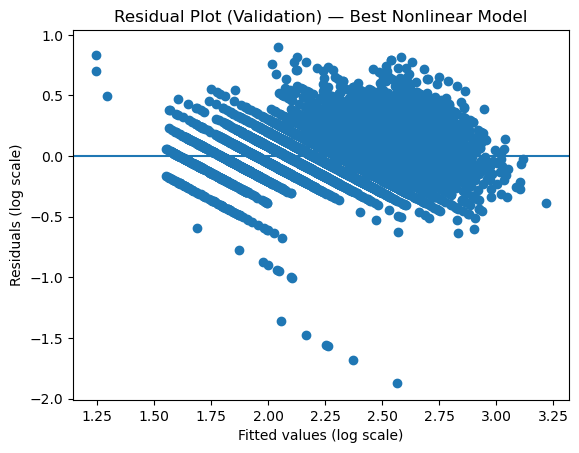

In [7]:
# Checking the assumptions (simple residual plot on log scale)

import matplotlib.pyplot as plt

best_model = spline_ridge if rmsle_spline < rmsle_poly else poly_ridge
best_model.fit(X_train, y_train)
pred_best = best_model.predict(X_val)

resid = y_val - pred_best

plt.figure()
plt.scatter(pred_best, resid)
plt.axhline(0)
plt.xlabel("Fitted values (log scale)")
plt.ylabel("Residuals (log scale)")
plt.title("Residual Plot (Validation) — Best Nonlinear Model")
plt.show()


#### Interpretation

The graph presents the residual plot for the best-performing nonlinear model (spline regression with Ridge regularization) evaluated on the validation dataset. Residuals are plotted against fitted values on the log-transformed scale used for RMSLE optimization.

The residuals are generally centered around zero without strong systematic patterns, suggesting that the model adequately captures the main nonlinear structure in the data. While some heteroscedasticity and a small number of extreme residuals are visible, particularly at higher fitted values, these patterns are not unexpected given the discrete nature of the `Rings` target variable and the large sample size.

Overall, the residual plot does not reveal severe violations of model assumptions and supports the suitability of the selected nonlinear model for prediction purposes (James et al., 2023).


### Kaggle Model Training and Submission

In [12]:
# Model 1 - Polynomial submission

# Train polynomial model on FULL training data
poly_ridge.fit(X, y_log)

# Predict on test and invert log1p
poly_test_pred = np.expm1(poly_ridge.predict(test))

# Build polynomial submission
sub_poly = sub.copy()
sub_poly["Rings"] = poly_test_pred

sub_poly_path = r"C:\Users\Kirti\submission_poly.csv"
sub_poly.to_csv(sub_poly_path, index=False)

sub_poly_path, sub_poly.head()


C:\Users\Kirti\anaconda3\Lib\site-packages\scipy\_lib\_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.03848e-24): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)


('C:\\Users\\Kirti\\submission_poly.csv',
       id      Rings
 0  90615   8.881365
 1  90616   9.830472
 2  90617  10.282609
 3  90618  10.308254
 4  90619   7.639927)

In [13]:
# Model 2 - Spline submission

# Train spline model on FULL training data
spline_ridge.fit(X, y_log)

# Predict on test and invert log1p
spline_test_pred = np.expm1(spline_ridge.predict(test))

# Build spline submission
sub_spline = sub.copy()
sub_spline["Rings"] = spline_test_pred

sub_spline_path = r"C:\Users\Kirti\submission_spline.csv"
sub_spline.to_csv(sub_spline_path, index=False)

sub_spline_path, sub_spline.head()


('C:\\Users\\Kirti\\submission_spline.csv',
       id      Rings
 0  90615   8.770411
 1  90616   9.714763
 2  90617  10.393661
 3  90618  10.195694
 4  90619   7.697206)

#### Interpretation

Two nonlinear models were trained on the full Abalone training dataset and used to generate Kaggle submissions:
(1) a second-degree polynomial regression model with Ridge regularization and (2) a cubic spline regression model with Ridge regularization. Both models were previously evaluated on a validation set using RMSLE, which aligns with Kaggle’s competition metric (Reade & Chow, 2024).

The polynomial Ridge model produced a valid submission file `submission_poly.csv`, while the spline Ridge model produced a second submission file `submission_spline.csv`. Although both models generated reasonable predictions for the number of rings, the spline-based model was selected as the preferred approach based on its slightly lower validation RMSLE and superior ability to capture localized nonlinear patterns in the predictor-response relationship (James et al., 2023).

The similarity in predicted values across the two submission files suggests that both nonlinear approaches learned comparable structural information from the data. However, the spline model’s additional flexibility provides improved generalization, particularly for complex relationships between physical measurements and abalone age. These results confirm that nonlinear modeling techniques meaningfully improve predictive performance over simpler linear alternatives and are appropriate for this competition task.


## References

James, G., Witten, D., Hastie, T., Tibshirani, R., & Taylor, J. (2023). *An introduction to statistical learning with applications in Python*. Springer Nature.

Reade, W., & Chow, A. (2024). *Regression with an Abalone dataset* [Dataset]. Kaggle. https://www.kaggle.com/competitions/playground-series-s4e4


## Appendix A: Kaggle Submission Evidence

### Figure A1. Kaggle Submissions Overview
Two nonlinear regression models, a polynomial regression model with Ridge regularization and a cubic spline regression model with Ridge regularization, were successfully submitted to the Kaggle competition *Regression with an Abalone Dataset*.

This combined screenshot displays both submissions from the Kaggle platform.

![Combined Kaggle Screenshot](kaggle_sub_4.png)